# <span style="color:teal">**Exploratory Analysis of U.S. Renewable Energy Consumption**</span>

### **Author:** Kami Denny
### **Purpose:** Perform exploratory data analysis (EDA) to uncover patterns and insights on U.S. Renewable Energy Consumption
### **Date:** February 18th, 2025

<hr style="border: 1px solid teal;">

###  <span style="color:teal">**Introduction:**</span>

#### In this Jupyter notebook, I plan to investigate the impact of sector-specific renewable energy consumption on overall energy trends in the United States. The sectors under consideration are Commercial, Electric Power, Industrial, Residential, and Transportation. Specifically, I will examine how the consumption of renewable energy in each sector influences the total renewable energy consumption over time. By analyzing the consumption patterns for each sector, I aim to gain a comprehensive understanding of the contributions of different sectors to the overall renewable energy landscape. My hypothesis is that the Electric Power sector will have the most significant impact on the total renewable energy consumption due to its large-scale energy requirements.

<hr style="border: 1px solid teal;">

#### 1. Imports

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Axes object (basic plot type returned by Seaborn)
from matplotlib.axes import Axes

<hr style="border: 1px solid teal;">

#### 2. Load Data

In [5]:
# Load the US_Renewable_Energy_Consumption.csv into pandas DataFrame
# We will use this data to analyze Sectors and their consumption of renewable energy
US_Renewable_df: pd.DataFrame = pd.read_csv('US_Renewable_Energy_Consumption.csv')

# List column names
US_Renewable_df.columns

# Inspect first few rows of the DataFrame
US_Renewable_df.head(10)

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
0,1973,1,Commerical,0.000,0.000,0.0,0.0,0.570,0.000,0.0,0.0,0.570,0.570,0.0,0.0,0.000,0.0
1,1973,1,Electric Power,0.000,0.490,0.0,0.0,0.054,0.157,0.0,0.0,0.211,89.223,0.0,0.0,88.522,0.0
2,1973,1,Industrial,1.040,0.000,0.0,0.0,98.933,0.000,0.0,0.0,98.933,99.973,0.0,0.0,0.000,0.0
3,1973,1,Residential,0.000,0.000,0.0,0.0,30.074,0.000,0.0,0.0,0.000,30.074,0.0,0.0,0.000,0.0
4,1973,1,Transportation,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0
5,1973,2,Commerical,0.000,0.000,0.0,0.0,0.515,0.000,0.0,0.0,0.515,0.515,0.0,0.0,0.000,0.0
6,1973,2,Electric Power,0.000,0.448,0.0,0.0,0.157,0.144,0.0,0.0,0.301,79.331,0.0,0.0,78.582,0.0
7,1973,2,Industrial,0.962,0.000,0.0,0.0,89.359,0.000,0.0,0.0,89.359,90.320,0.0,0.0,0.000,0.0
8,1973,2,Residential,0.000,0.000,0.0,0.0,27.164,0.000,0.0,0.0,0.000,27.164,0.0,0.0,0.000,0.0
9,1973,2,Transportation,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0


<hr style="border: 1px solid teal;">

#### 3. Initial Data Inspection

In [6]:
# Inspect the shape of the DataFrame with shape attribute
US_Renewable_df.shape

# Inspect the data types of the columns with dtypes attribute
US_Renewable_df.dtypes

# Inspect the data types of the columns with info() method
US_Renewable_df.info()

# Get the unique values in a specific column
unique_sector = US_Renewable_df['Sector'].unique()
print(f"Unique values in the 'Sector' column: {unique_sector}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                3065 non-null   int64  
 1   Month                               3065 non-null   int64  
 2   Sector                              3065 non-null   object 
 3   Hydroelectric Power                 3065 non-null   float64
 4   Geothermal Energy                   3065 non-null   float64
 5   Solar Energy                        3065 non-null   float64
 6   Wind Energy                         3065 non-null   float64
 7   Wood Energy                         3065 non-null   float64
 8   Waste Energy                        3065 non-null   float64
 9   Fuel Ethanol, Excluding Denaturant  3065 non-null   float64
 10  Biomass Losses and Co-products      3065 non-null   float64
 11  Biomass Energy                      3065 no

#### <span style="color:teal">**Summary of Initial Inspection**</span>
##### - The data doesn't have any null values in the 3,065 total attributes.
##### - The DataFrame contains 17 columns
##### - `Sector` column is categorical. There are two numeric integer fields, and 14 numeric float fields.
##### - The unique values in the `Sector` column are: `Commercial`, `Electric Power`, `Industrial`, `Residential`, and `Transportation`.

<hr style="border: 1px solid teal;">

#### 4. Initial Descriptive Statistics

In [7]:
# Inspect summary statistics for numerical columns:
US_Renewable_df.describe()

,Year,Month,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
count,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000
mean,1998.042414,6.491028,0.169759,1.146369,2.015008,4.282404,36.644408,5.820124,6.976648,4.834706,46.285969,70.872209,0.428949,0.031752,15.757374,0.953720
std,14.747378,3.456934,0.373819,1.550857,5.774511,18.124793,46.900639,8.247359,21.911920,15.601717,64.241520,71.197761,2.687850,0.258149,32.134059,3.985003
min,1973.000000,1.000000,-0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1985.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.483000,0.000000,0.000000,0.000000,0.258000,2.070000,0.000000,0.000000,0.000000,0.000000
50%,1998.000000,6.000000,0.000000,0.357000,0.004000,0.000000,12.062000,0.108000,0.007000,0.000000,9.716000,50.984000,0.000000,0.000000,0.000000,0.000000
75%,2011.000000,9.000000,0.036000,1.673000,0.774000,0.001000,51.808000,12.764000,1.283000,0.000000,89.359000,126.982000,0.000000,0.000000,0.000000,0.000000
max,2024.000000,12.000000,2.047000,5.951000,64.040000,157.409000,183.628000,32.875000,104.420000,75.373000,233.200000,308.175000,38.344000,4.101000,117.453000,27.871000


<hr style="border: 1px solid teal;">

#### 5. Initial Data Distribution for Numerical Columns

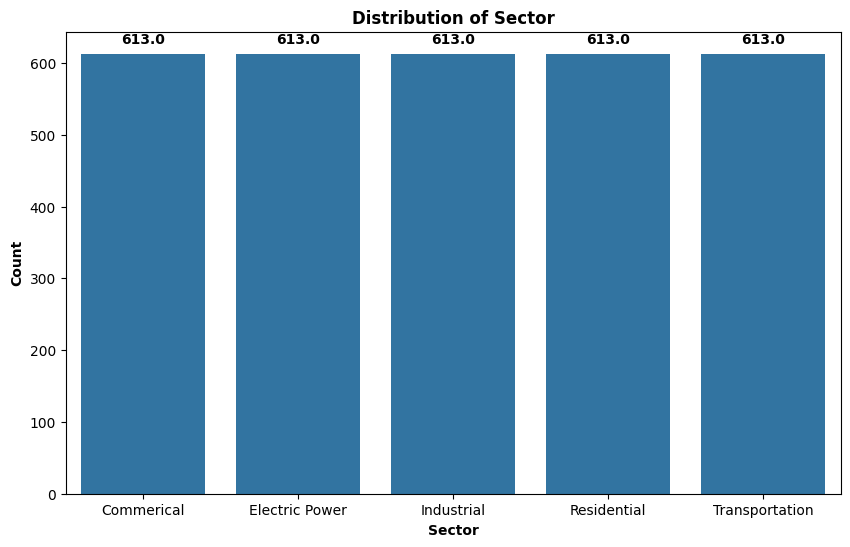

In [11]:
# Inspect value counts by categorical column
US_Renewable_df['Sector'].value_counts()

# Inspect value counts for ALL categorical columns
for col in US_Renewable_df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=col, data=US_Renewable_df)
    plt.title(f'Distribution of {col}', fontweight='bold')
    plt.xlabel(col, fontweight='bold')
    plt.ylabel('Count', fontweight='bold')
    
    # Annotate each bar with the count
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontweight='bold')
    
    plt.show()

#### <span style="color:teal">**Summary of Distribution of Sectors**</span>
##### - Each sector (`Commercial`, `Electric Power`, `Industrial`, `Residential`, and `Transportation`) has 613 features.
##### - The U.S. Renewable Energy Consumption dataset contains an equal number of samples for each sector.
##### - This balance ensures that the dataset is not biased towards any particular sector.